#### KNN for classification illustration using IBM Attrition data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('IBM data.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Missing value analysis

In [8]:
df.isnull().sum()  #There are no missing values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.duplicated().sum() # There are no duplicates

0

### EDA

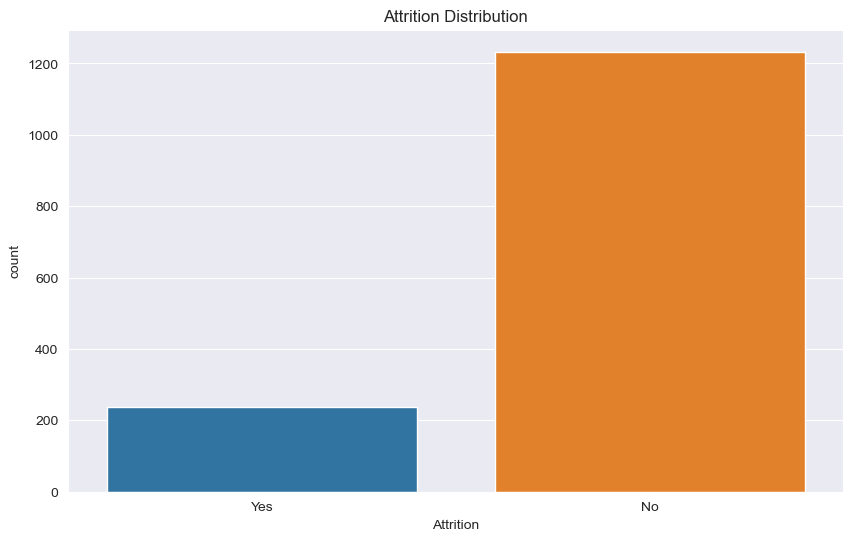

In [13]:
# Performing visualization  for 'Attrition' as this is a binary classfication problem

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = df)
plt.title('Attrition Distribution')
plt.show()



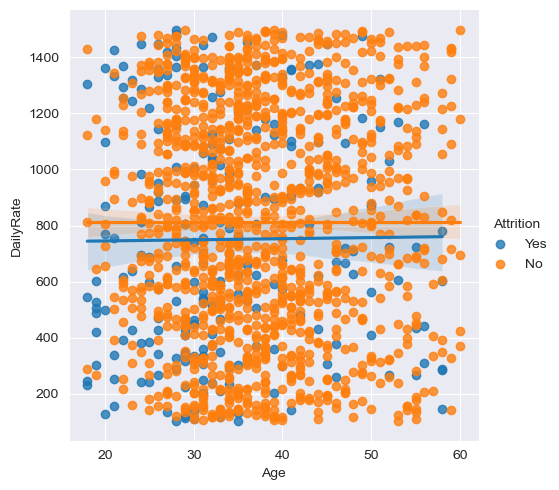

In [18]:

sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)


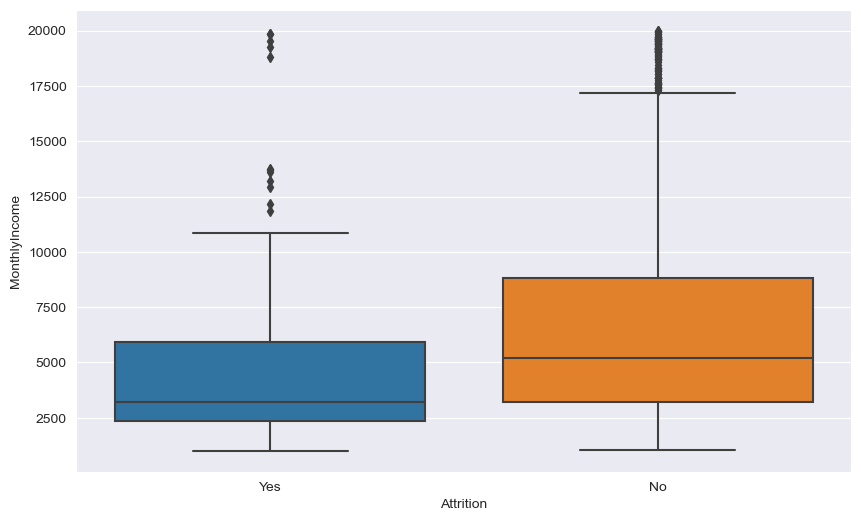

In [19]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = df)
plt.show()

### Data Preprocessing

In [20]:
#dropping irrelevant columns

df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)


In [21]:
df.shape

(1470, 31)

### Choosing input and output data (x,y)

In [22]:
y = df.iloc[:, 1]
X = df
X.drop('Attrition', axis = 1, inplace = True)

### Label encoding

- The dataset contains 7 categorical data (converting those to integer data type)


In [23]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

### Creating dummy variable

In [25]:
dum_BusinessTravel = pd.get_dummies(df['BusinessTravel'], 
                                    prefix ='BusinessTravel')
dum_Department = pd.get_dummies(df['Department'], 
                                prefix ='Department')
dum_EducationField = pd.get_dummies(df['EducationField'], 
                                    prefix ='EducationField')
dum_Gender = pd.get_dummies(df['Gender'], 
                            prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(df['JobRole'], 
                             prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(df['MaritalStatus'], 
                                   prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(df['OverTime'], 
                              prefix ='OverTime', drop_first = True)
# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department, 
               dum_EducationField, dum_Gender, dum_JobRole, 
               dum_MaritalStatus, dum_OverTime], axis = 1)
# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField', 
        'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], 
        axis = 1, inplace = True)


In [26]:
 
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


### Split into train and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 40)

### Using KNeighborsClassifier for finding the best number of neighbour with the help of misclassification error. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [] 
cv_scores = [] 
   
from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 40, 2): 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score( 
        knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores] 
   
# determining the best k 
optimal_k = neighbors[error_rate.index(min(error_rate))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
   


The optimal number of neighbors is  7 


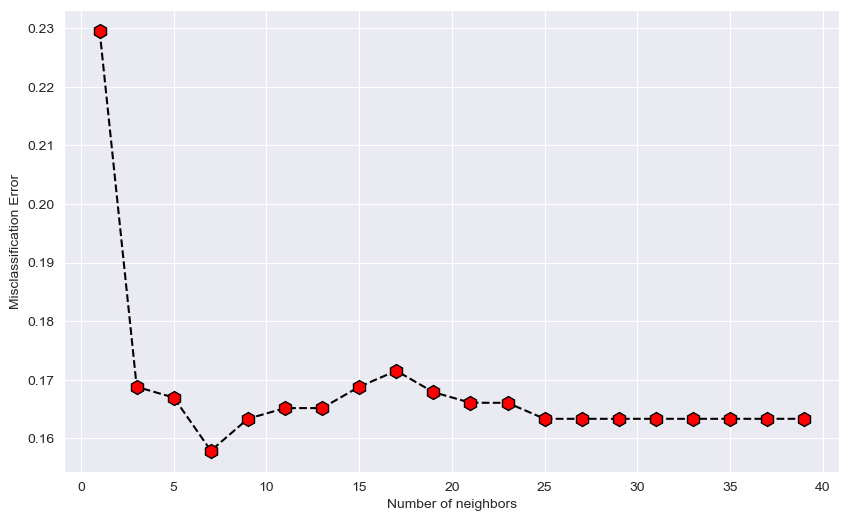

In [31]:
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(range(1, 40, 2), error_rate, color ='black', linestyle ='dashed', marker ='h',
         markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show()

### Prediction score

In [33]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
 
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
                y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
                y_train, clf.predict(X_train))))
 
        res = cross_val_score(clf, X_train, y_train, 
                              cv = 10, scoring ='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(
                y_train, clf.predict(X_train))))
        print("----------------------------------------------------------")
                
    elif train == False:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
                classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(
                confusion_matrix(y_test, clf.predict(X_test)))) 
        print("accuracy score: {0:.4f}\n".format(
                accuracy_score(y_test, clf.predict(X_test))))
        print("-----------------------------------------------------------")
         
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       922
           1       0.83      0.19      0.32       180

    accuracy                           0.86      1102
   macro avg       0.85      0.59      0.62      1102
weighted avg       0.86      0.86      0.82      1102


Confusion Matrix: 
 [[915   7]
 [145  35]]

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0148
accuracy score: 0.8621

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       311
           1       0.14      0.04      0.06        57

    accuracy                           0.82       368
   macro avg       0.49      0.50      0.48       368
weighted avg       0.74      0.82      0.77       368


Confusion Matrix: 
 [[299  12]
 [ 55   2]]

accuracy score: 0.817

### Inference: Training Results 

##### 1. Precision: 
- In class 0, precision is high (0.86), indicating that the model is good at correctly predicting class 0 instances.
- However, in class 1, precision is lower (0.83), suggesting that the model has more false positives in predicting class 1.

##### 2. Recall (Sensitivity): 
- Class 0 has high recall (0.99), indicating that the model captures a large proportion of actual class 0 instances. 
- In class 1, recall is lower (0.19), suggesting that the model misses many actual class 1 instances.

##### 3. F1-Score:
- Class 0 has a high F1-score (0.92), while class 1 has a lower F1-score (0.32).

##### 4.Accuracy: 
- Overall accuracy on the training set is 0.86, which is the ratio of correctly predicted instances to the total instances.

### Confusion Matrix - Training results

- True positives (TP): 35
- False positives (FP): 7
- True negatives (TN): 915
- False negatives (FN): 145

### Test Results:

The results on the test set show a similar pattern to the training set, but the model's performance is slightly worse.

1. Precision: Class 0 has a precision of 0.84, and class 1 has a precision of 0.14.

2. Recall: Class 0 has a recall of 0.96, and class 1 has a recall of 0.04.

3. F1-Score: Class 0 has a higher F1-score (0.90), while class 1 has a very low F1-score (0.06).

4. Accuracy: Overall accuracy on the test set is 0.82.

### Confusion Matrix:

1. True positives (TP): 2
2. False positives (FP): 12
3. True negatives (TN): 299
4. False negatives (FN): 55

### Conclusion:

The model performs well on classifying class 0 but struggles with class 1, especially in terms of recall and precision.

#### Note:
Further analysis and potentially adjusting the model or its parameters might be necessary to improve its performance, especially in capturing class 1 instances.